In [19]:

import numpy as np

import os

import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.metrics import precision_score

In [20]:
fname1=os.path.join('train_data.txt')
fname2=os.path.join("test_data.txt")
train=np.loadtxt(fname1)
test=np.loadtxt(fname2)
print(train)
print(train.shape)
print(test)
print(test.shape)

[[ 0.          0.9499519   0.9499519 ]
 [ 0.          0.87068028  0.87068028]
 [ 0.          1.3803659   1.3803659 ]
 ...
 [ 1.         -0.60914983  1.6091498 ]
 [ 1.         -0.6408895   1.6408895 ]
 [ 1.         -0.30501103  1.305011  ]]
(2000, 3)
[[ 0.          1.5280584   1.5280584 ]
 [ 0.          1.2969505   1.2969505 ]
 [ 0.          1.7390643   1.7390643 ]
 [ 0.          0.92263356  0.92263356]
 [ 0.          1.3093527   1.3093527 ]
 [ 0.          1.118263    1.118263  ]
 [ 0.          0.89453672  0.89453672]
 [ 0.          1.6249479   1.6249479 ]
 [ 0.          1.3570661   1.3570661 ]
 [ 0.          1.0618551   1.0618551 ]
 [ 0.          0.90873467  0.90873467]
 [ 0.          1.1261663   1.1261663 ]
 [ 0.          0.78803029  0.78803029]
 [ 0.          1.5126491   1.5126491 ]
 [ 0.          0.98746578  0.98746578]
 [ 0.          1.5136148   1.5136148 ]
 [ 0.          1.1023526   1.1023526 ]
 [ 0.          1.1717792   1.1717792 ]
 [ 0.          0.80104977  0.80104977]
 [ 0.    

In [21]:
X_train=train[:,1:3]
print(X_train)

y_train1=train[:,0]
y_train=y_train1.reshape(-1,1)
print(y_train)

X_test=test[:,1:3]

y_test1=test[:,0]
y_test=y_test1.reshape(-1,1)
print(y_test)

m=2000 # number of sample points

[[ 0.9499519   0.9499519 ]
 [ 0.87068028  0.87068028]
 [ 1.3803659   1.3803659 ]
 ...
 [-0.60914983  1.6091498 ]
 [-0.6408895   1.6408895 ]
 [-0.30501103  1.305011  ]]
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [22]:
# define random batch function
def random_batch(X_train, y_train, batch_size):
  rnd_indices = np.random.randint(0, len(X_train), batch_size)
  X_batch = X_train[rnd_indices]
  y_batch = y_train[rnd_indices]
  return X_batch, y_batch


In [39]:
tf.reset_default_graph()

# define a MLP to classify this dataset
n_inputs=2
n_hidden_1 = 2
n_outputs = 1
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.float32, shape=(None,1), name="y")

A1 = tf.Variable(tf.random_normal(shape=[n_inputs,n_hidden_1]))
b1 = tf.Variable(tf.random_normal(shape=[n_hidden_1]))


A2 = tf.Variable(tf.random_normal(shape=[n_hidden_1,n_outputs]))
b2 = tf.Variable(tf.random_normal(shape=[n_outputs]))

#define model according to Fig. 3
hidden_output_1 = tf.nn.sigmoid(tf.add(tf.matmul(X,A1),b1))
y_proba = tf.nn.sigmoid(tf.add(tf.matmul(hidden_output_1,A2),b2))




# define log loss and optimizer
loss = tf.losses.log_loss(y, y_proba)
learning_rate = 0.05
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

#training: output accuracy
n_epochs = 2000
batch_size = 100
n_batches = int(np.ceil(m/batch_size))
loss1=[]
epoch1=[]

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(n_epochs):
    for batch_index in range(n_batches):
      X_batch, y_batch = random_batch(X_train, y_train, batch_size)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
      # print(b3.eval())
    loss_val = loss.eval({X: X_test, y: y_test})
    loss1.append(loss_val)
    epoch1.append(epoch)
    if epoch % 100 == 0:
      y_proba_train = y_proba.eval(feed_dict={X: X_train, y: y_train})
      y_train_pred = (y_proba_train >= 0.5)
      acc = precision_score(y_train, y_train_pred)
      print("Epoch:", epoch, "\tLoss:", loss_val, "\t Acc:", acc)
      

  y_proba_val = y_proba.eval(feed_dict={X: X_test, y: y_test})
  y_pred = (y_proba_val >= 0.5)


print("Test Acc:", precision_score(y_test, y_pred))

Epoch: 0 	Loss: 0.759716 	 Acc: 0.5
Epoch: 100 	Loss: 0.6842363 	 Acc: 0.5318352059925093
Epoch: 200 	Loss: 0.5537689 	 Acc: 0.6459948320413437
Epoch: 300 	Loss: 0.39712602 	 Acc: 0.8271298593879239
Epoch: 400 	Loss: 0.22945058 	 Acc: 0.9174311926605505
Epoch: 500 	Loss: 0.14613341 	 Acc: 0.9578544061302682
Epoch: 600 	Loss: 0.10306369 	 Acc: 0.9737098344693281
Epoch: 700 	Loss: 0.07754456 	 Acc: 0.9813542688910697
Epoch: 800 	Loss: 0.061314248 	 Acc: 0.9881422924901185
Epoch: 900 	Loss: 0.0504375 	 Acc: 0.9900990099009901
Epoch: 1000 	Loss: 0.042382613 	 Acc: 0.9930486593843099
Epoch: 1100 	Loss: 0.036563188 	 Acc: 0.9970089730807578
Epoch: 1200 	Loss: 0.031924576 	 Acc: 0.998003992015968
Epoch: 1300 	Loss: 0.028305255 	 Acc: 0.998003992015968
Epoch: 1400 	Loss: 0.025418224 	 Acc: 0.998003992015968
Epoch: 1500 	Loss: 0.022952678 	 Acc: 0.999000999000999
Epoch: 1600 	Loss: 0.020864598 	 Acc: 0.999000999000999
Epoch: 1700 	Loss: 0.019074848 	 Acc: 0.999000999000999
Epoch: 1800 	Loss: 0.

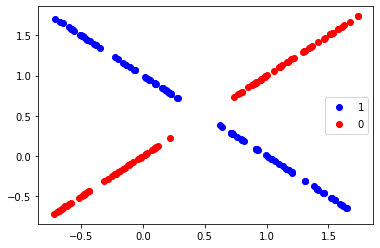

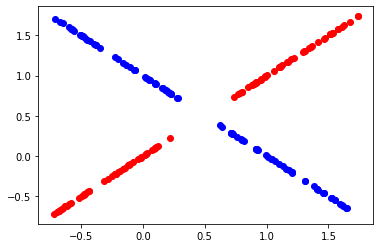

In [42]:
# visualize performance
y_pred_idx = y_pred.reshape(-1)
plt.plot(X_test[y_pred_idx, 0], X_test[y_pred_idx, 1], 'bo', label="$1$")
plt.plot(X_test[~y_pred_idx, 0],X_test[~y_pred_idx, 1], 'ro', label="$0$")
plt.legend()
plt.show()
y_test_idx = y_test.reshape(-1)==1
plt.plot(X_test[y_test_idx, 0], X_test[y_test_idx, 1], 'bo', label="$1$")
plt.plot(X_test[~y_test_idx, 0],X_test[~y_test_idx, 1], 'ro', label="$0$")
plt.show()


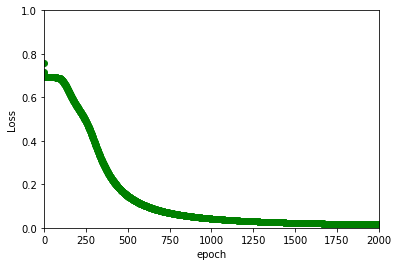

In [44]:
# epoch vs training loss

plt.xlim((0,2000))
plt.ylim((0,1))
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.plot(epoch1,loss1,'go')
plt.show()

# Comments

The network was trained with some adjusting to the parameters. The loss improved as the number of epochs increased leading to nearly perfect accuracy at the end of $2000$ epochs.